## Algorithm Assignment Amit Kharote (Ravet 5-7 weekend batch)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Step 3 - Seperate X and Y(Machine failure)

In [6]:
X = df.drop(columns=["id", "Product ID", "Machine failure"])
Y = df[["Machine failure"]]

In [7]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

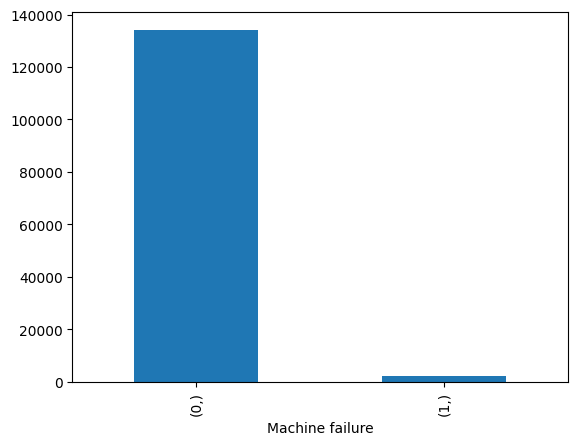

In [10]:
Y.value_counts().plot(kind="bar")

## step 4 - Preprocessing on X

In [11]:
X.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['Type']

In [14]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy= "most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


## Step 5 - Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=22)

In [21]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
104381,0.127386,-0.246230,-0.233040,-0.005721,-0.162729,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
134596,0.771772,0.403510,-0.679932,0.041325,-0.788072,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
6709,0.019989,-0.318424,-0.384407,-0.111576,-1.350882,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
38881,0.395880,0.259123,-0.528565,0.652932,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
68244,0.342182,0.620091,0.084109,0.170704,0.822188,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [22]:
ytrain.head()

,Machine failure
104381,0
134596,0
6709,0
38881,0
68244,0


In [23]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
120658,0.127386,0.908864,-0.492526,0.253035,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
129472,-1.429878,-0.895971,0.949060,-0.970178,-0.819340,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
74934,-1.215083,-0.246230,-0.052842,-0.041006,1.041058,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
131609,2.221638,2.136152,-0.687140,1.664435,1.369364,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120768,1.953144,1.558605,-0.910586,1.452725,-1.225813,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [24]:
ytest.head()

,Machine failure
120658,0
129472,0
74934,0
131609,0
120768,0


In [25]:
xtrain.shape

(109143, 13)

In [26]:
xtest.shape

(27286, 13)

## Step 6 - Algorithm Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [28]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [30]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [41]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest, cv=5):
    # Fit the modelon train data
    model.fit(xtrain, ytrain)

    # Predict the results for train and test 
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Evaluate results on train and test        # f1 = 2*precision*recall / (precission + recall)
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    # Cross validation
    scores = cross_val_score(model, xtrain, ytrain, cv=cv, scoring="f1_macro")
    f1_cv = scores.mean()

    # Create a dictionary of results
    r = {
        "model name" : model.__class__.__name__,          # __ They are a naming convention to avoid name clashes with user-defined variables or methods
        "model": model,                                   # __class__ and __name__ are special attributes in Python that store the class of an object and the name of a class
        "F1 train": f1_train,
        "F1 test": f1_test,
        "F1 CV": f1_cv
    }
    return r

In [42]:
def evaluate_and_compare(models: list, xtrain, ytrain, xtest, ytest, cv=5):
    # Initialise the results list
    results = []
    
    # Apply for loop on models
    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain, xtest, ytest, cv)
        print(r)
        results.append(r)

    # Convert the results to dataframe
    df = pd.DataFrame(results)

    # Sort the results
    s = df.sort_values(by="F1 CV", ascending=False).reset_index(drop=True)

    # Get the best model
    best_model = s.loc[0, "model"]

    return s, best_model

In [43]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [ ]:
comp, best_model = eval_and_compare(models, xtrain, ytrain, xtest, ytest)

{'model name': 'LogisticRegression', 'model': LogisticRegression(), 'f1 train': np.float64(0.9347004351585144), 'f1 test': np.float64(0.9138211677108452), 'f1 CV': <built-in method mean of numpy.ndarray object at 0x0000025DB2E81830>}
{'model name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1 train': np.float64(0.9982125461269922), 'f1 test': np.float64(0.8734559839104808), 'f1 CV': <built-in method mean of numpy.ndarray object at 0x0000025DB2E83F30>}
